<a href="https://colab.research.google.com/github/K4tyhs/API-test/blob/main/Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dontpad.com/agrupamento_kmeans

In [1]:
#Importação de bibliotecas

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Letura da base

In [2]:
df = pd.read_csv('/content/clientes_shopping.csv', sep=',', encoding='iso-8859-1')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

# Análise gráfica da base

In [5]:
import plotly.express as px

In [6]:
hist =  px.histogram (df,  x = "Age", nbins=40)
hist.update_layout(width=600,height=400,title_text='Distribuição das idades')
hist.show()

In [7]:
df['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


In [8]:
#construir o gráfico pie para a coluna Genre utilizando plotly

pie = px.pie(df, names='Genre')
pie.update_layout(width=600,height=400,title_text='Distribuição de Gênero')
pie.show()

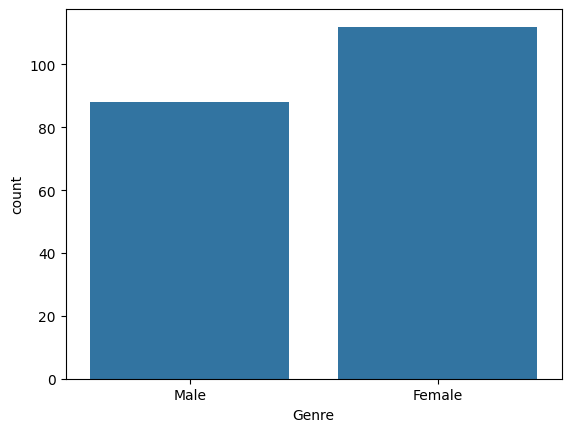

In [9]:
import seaborn as sns
sns.countplot(x='Genre', data=df);

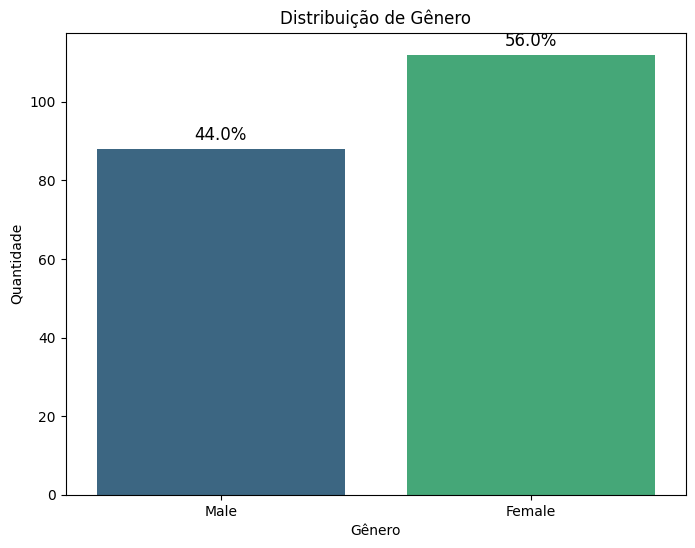

In [10]:
#construir o gráfico de coluna para a coluna Genre utilizando seaborn indicando a porcentagem de cada coluna diferenciando por cor

import matplotlib.pyplot as plt

# Calcula a porcentagem de cada gênero
genre_counts = df['Genre'].value_counts(normalize=True) * 100
# Cria o gráfico de barras com porcentagens
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Genre', data=df, palette='viridis')

# Adiciona as porcentagens em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(df)*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')


plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

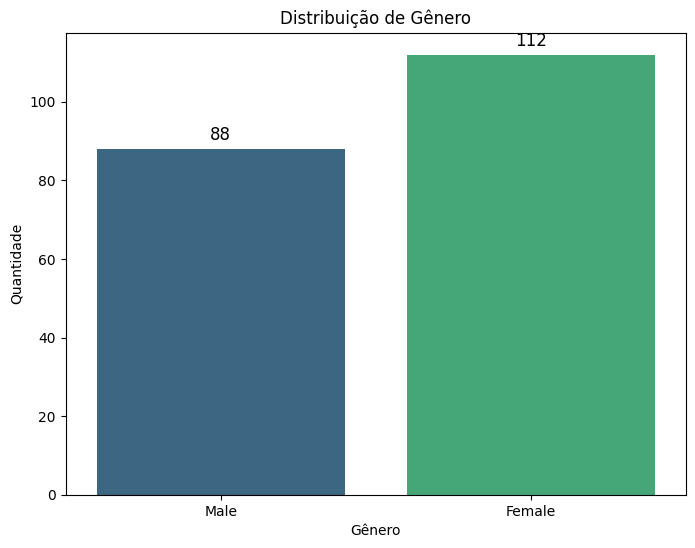

In [11]:
#construir o gráfico de coluna para a coluna Genre utilizando seaborn mostrando a quantidade de cada coluna na própria coluna diferenciando por cor
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Genre', data=df, palette='viridis')

# Adiciona a quantidade de cada gênero em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()


In [12]:
df['Spending Score (1-100)'].value_counts()

,count
Spending Score (1-100),
42,8
55,7
73,6
46,6
48,5
...,...
68,1
85,1
23,1


In [13]:
hist =  px.histogram (df,  x = "Spending Score (1-100)", nbins=40)
hist.update_layout(width=600,height=400,title_text='Pontuação dos clientes')
hist.show()


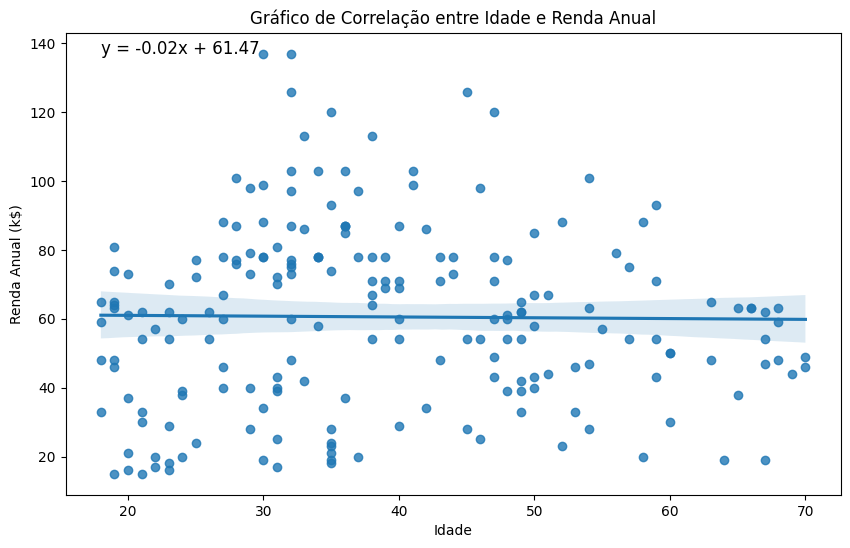

In [18]:
#criar um gráfico de correlação entre Age e Annual Income com a reta de correlação e sua equação

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Gráfico de Correlação entre Idade e Renda Anual')
plt.xlabel('Idade')
plt.ylabel('Renda Anual (k$)')

# Calcular a linha de regressão e sua equação
slope, intercept = np.polyfit(df['Age'], df['Annual Income (k$)'], 1)
plt.text(df['Age'].min(), df['Annual Income (k$)'].max(), f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)

plt.show()


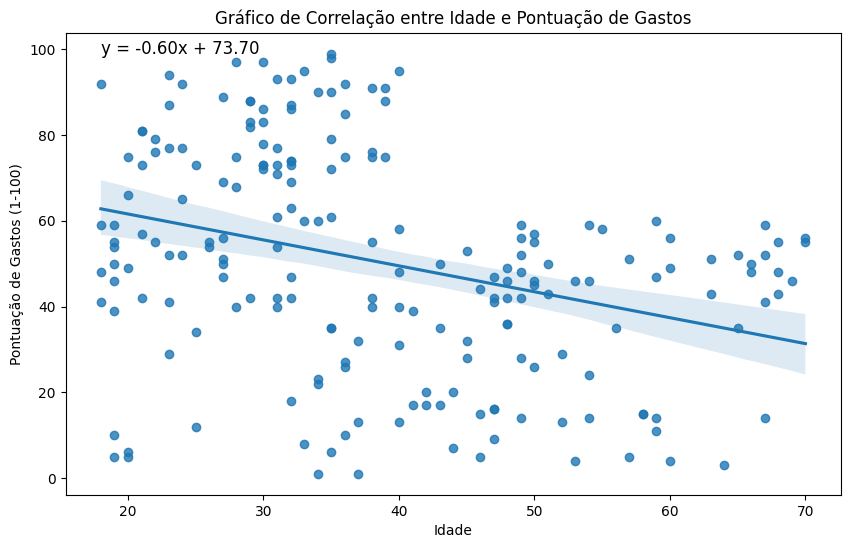

In [19]:
#criar um gráfico de correlação entre Age e Spending Score com a reta de correlação e sua equação

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Gráfico de Correlação entre Idade e Pontuação de Gastos')
plt.xlabel('Idade')
plt.ylabel('Pontuação de Gastos (1-100)')

# Calcular a linha de regressão e sua equação
slope, intercept = np.polyfit(df['Age'], df['Spending Score (1-100)'], 1)
plt.text(df['Age'].min(), df['Spending Score (1-100)'].max(), f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)

plt.show()

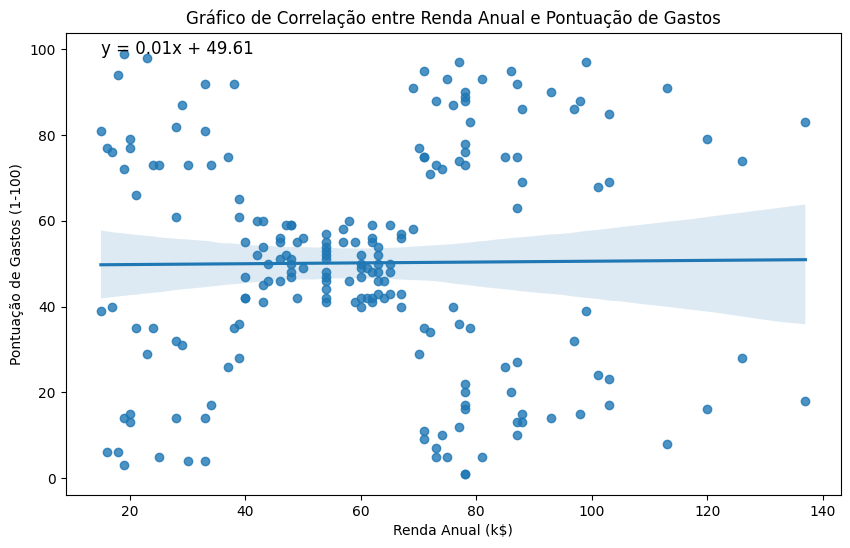

In [20]:
#criar um gráfico de correlação entre Annual Income e Spending Score com a reta de correlação e sua equação

plt.figure(figsize=(10, 6))
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Gráfico de Correlação entre Renda Anual e Pontuação de Gastos')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de Gastos (1-100)')

# Calcular a linha de regressão e sua equação
slope, intercept = np.polyfit(df['Annual Income (k$)'], df['Spending Score (1-100)'], 1)
plt.text(df['Annual Income (k$)'].min(), df['Spending Score (1-100)'].max(), f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)

plt.show()


In [21]:
#Renomear as colunas

df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)
df.rename(columns={'Genre': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)
df.rename(columns={'Annual Income (k$)': 'renda_anual'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'pontuacao_cliente'}, inplace=True)

In [22]:
df.head()

,identificacao,genero,idade,renda_anual,pontuacao_cliente
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
#Verificação dos valores nulos

df.isnull().sum()


,0
identificacao,0
genero,0
idade,0
renda_anual,0
pontuacao_cliente,0


#Tipo de dados


In [24]:
df.dtypes

,0
identificacao,int64
genero,object
idade,int64
renda_anual,int64
pontuacao_cliente,int64


In [25]:
df.describe()

,identificacao,idade,renda_anual,pontuacao_cliente
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#verificação da existência de outliers

boxplot = px.box(df, y="renda_anual")
boxplot.show()